## ST 563 Final Project: Modeling 

#### Load Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [144]:
df_train = pd.read_csv("C://Users//JCCLI//Downloads//YearPredTrain.csv")
df_test = pd.read_csv("C://Users//JCCLI//Downloads//YearPredTest.csv")

In [117]:
df_train_ = pd.read_csv("C://Users//JCCLI//Downloads//YearPredTrainnewpca.csv")
df_test_ = pd.read_csv("C://Users//JCCLI//Downloads//YearPredTestnewpca.csv")

In [48]:
df_train.head()

,Unnamed: 0,timbreAvg1,timbreAvg2,timbreAvg3,timbreAvg4,timbreAvg5,timbreAvg6,timbreAvg7,timbreAvg8,timbreAvg9,...,timbreCov76,timbreCov77,timbreCov78,Year,Class,averagesmean,averagescov,avgcat,covcat,decade
0,1,47.51327,-44.95245,45.64918,10.04974,-3.65101,-12.30126,6.47744,-12.26870,-1.29127,...,6.12790,44.11512,-0.26215,1985,between 1980 - 2000,2.244174,52.767364,between -10 and 10,0 to 100,1980s
1,3,48.64368,19.02361,16.95894,0.61093,-23.73662,-23.70953,16.00881,0.53231,1.85766,...,-1.92017,-47.79713,-15.62944,2008,after 2000,4.696901,87.322374,between -10 and 10,0 to 100,2000s
2,4,41.51566,1.03177,32.26513,21.67532,-3.62720,9.04089,-7.34826,1.26222,-3.92014,...,10.72985,225.99154,9.49741,2006,after 2000,7.337942,202.932833,between -10 and 10,Greater than 200,2000s
3,5,47.54717,-29.56791,70.13106,4.02452,68.56413,-10.44139,-21.01004,0.25609,-6.05868,...,-3.92572,-141.98142,-3.69776,2009,after 2000,9.928260,150.142112,between -10 and 10,100 to 200,2000s
4,6,50.68050,83.13509,18.08280,-7.39577,-44.23235,-22.65254,4.13360,0.91453,8.05286,...,-2.55386,-33.01121,-7.51525,1999,between 1980 - 2000,8.865933,72.980727,between -10 and 10,0 to 100,1990s


In [119]:
df_train_.drop(['Unnamed: 0', 'decade','averagescov', 'averagesmean','avgcat','covcat','Year','Class'], axis=1, inplace=True)
df_test_.drop(['Unnamed: 0', 'decade', 'averagescov','averagesmean','Year','Class','avgcat','covcat'], axis=1, inplace=True)

In [118]:
df_train_average = df_train_.loc[:,['averagesmean','averagescov','avgcat','covcat','Year','Class']]
df_test_average = df_test_.loc[:,['averagesmean','averagescov','avgcat','covcat','Year','Class']]

In [120]:
train = pd.concat([df_train_,df_train_average],axis = 1)
test = pd.concat([df_test_,df_test_average],axis=1)

In [121]:
train.head(10)

,timbreAvg1,timbreAvg2,timbreAvg3,timbreAvg4,timbreAvg5,timbreAvg6,timbreAvg7,timbreAvg8,timbreAvg9,timbreAvg10,...,timbreCov75,timbreCov76,timbreCov77,timbreCov78,averagesmean,averagescov,avgcat,covcat,Year,Class
0,47.51327,-44.95245,45.64918,10.04974,-3.65101,-12.30126,6.47744,-12.26870,-1.29127,-11.51302,...,-42.70567,6.12790,44.11512,-0.26215,2.244174,66.455698,between -10 and 10,0 to 100,1985,between 1980 - 2000
1,48.64368,19.02361,16.95894,0.61093,-23.73662,-23.70953,16.00881,0.53231,1.85766,4.55437,...,145.72511,-1.92017,-47.79713,-15.62944,4.696901,116.251448,between -10 and 10,100 to 200,2008,after 2000
2,41.51566,1.03177,32.26513,21.67532,-3.62720,9.04089,-7.34826,1.26222,-3.92014,0.84533,...,-85.97225,10.72985,225.99154,9.49741,7.337942,308.771827,between -10 and 10,Greater than 200,2006,after 2000
3,47.54717,-29.56791,70.13106,4.02452,68.56413,-10.44139,-21.01004,0.25609,-6.05868,-6.37616,...,-29.79330,-3.92572,-141.98142,-3.69776,9.928260,225.334550,between -10 and 10,Greater than 200,2009,after 2000
4,50.68050,83.13509,18.08280,-7.39577,-44.23235,-22.65254,4.13360,0.91453,8.05286,6.60700,...,-15.49372,-2.55386,-33.01121,-7.51525,8.865933,103.033583,between -10 and 10,100 to 200,1999,between 1980 - 2000
5,42.56968,50.06985,65.36305,12.72721,-1.86837,-2.90904,-15.94896,-3.99320,-0.98952,0.71256,...,208.66947,1.59064,-201.76512,-14.07417,12.490808,198.225830,greater than 10,100 to 200,1982,between 1980 - 2000
6,49.69402,46.68172,23.36307,0.24092,-4.14913,-17.64009,-8.56667,-2.96960,2.66880,2.13360,...,-26.86181,-0.97417,43.61881,-1.05323,8.099688,88.342071,between -10 and 10,0 to 100,2000,between 1980 - 2000
7,40.79397,5.69280,20.44082,1.31588,9.39103,-8.04863,-2.94090,-2.72858,-1.27705,-2.69700,...,13.81047,-7.11790,-125.27427,-18.66606,5.467183,339.103355,between -10 and 10,Greater than 200,2007,after 2000
8,48.48159,7.99600,18.27200,-4.09611,-8.99678,-6.69250,12.61039,5.22708,2.51801,2.10565,...,-88.65301,33.89294,140.04211,13.17926,6.590065,138.714703,between -10 and 10,100 to 200,2007,after 2000
9,51.98866,30.90924,54.15377,4.46800,-13.57421,-15.38576,-3.51888,7.53412,2.00177,2.51796,...,-18.29788,7.87025,1.95706,1.14650,9.489510,67.739905,between -10 and 10,0 to 100,2007,after 2000


In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82323 entries, 0 to 82322
Data columns (total 94 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timbreAvg1    82323 non-null  float64
 1   timbreAvg2    82323 non-null  float64
 2   timbreAvg3    82323 non-null  float64
 3   timbreAvg4    82323 non-null  float64
 4   timbreAvg5    82323 non-null  float64
 5   timbreAvg6    82323 non-null  float64
 6   timbreAvg7    82323 non-null  float64
 7   timbreAvg8    82323 non-null  float64
 8   timbreAvg9    82323 non-null  float64
 9   timbreAvg10   82323 non-null  float64
 10  timbreAvg11   82323 non-null  float64
 11  timbreAvg12   82323 non-null  float64
 12  timbreCov1    82323 non-null  float64
 13  timbreCov2    82323 non-null  float64
 14  timbreCov3    82323 non-null  float64
 15  timbreCov4    82323 non-null  float64
 16  timbreCov5    82323 non-null  float64
 17  timbreCov6    82323 non-null  float64
 18  timbreCov7    82323 non-nu

#### Set predictors and response

In [126]:
features = train.loc[:,"timbreAvg1":"covcat"]
target = df_train['Year']

features_test = test.loc[:,"timbreAvg1":"covcat"]
target_test = df_test['Year']

In [5]:
train = pd.concat([x_train,y_train],axis = 1)
test = pd.concat([x_test,y_test],axis=1)

NameError: name 'x_train' is not defined

In [124]:
# train data
le = preprocessing.LabelEncoder()
for column_name in train.columns:
    if train[column_name].dtype == object:
        train[column_name] = le.fit_transform(train[column_name])
    else:
        pass

In [125]:
le = preprocessing.LabelEncoder()
for column_name in test.columns:
    if test[column_name].dtype == object:
        test[column_name] = le.fit_transform(test[column_name])
    else:
        pass

#### Standardize the predictors

In [127]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

# Standardize the predictors
features_scaled = scale.fit_transform(features)
scaled_train_df = pd.DataFrame(features_scaled, columns = features.columns)
scaled_train_df
train_response = pd.DataFrame(target)
features_scaled_test = scale.fit_transform(features_test)
scaled_test_df = pd.DataFrame(features_scaled_test, columns = features_test.columns)
scaled_test_df
test_response = pd.DataFrame(target_test)

In [128]:
from sklearn.decomposition import PCA, KernelPCA

In [129]:
pca = PCA()
train_df_PCA = pd.DataFrame(pca.fit_transform(scaled_train_df))
train_df_PCA

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,-3.484909,-0.220853,1.428901,-1.224151,1.088006,-0.033972,0.643595,-1.541609,0.404626,1.649312,...,-0.138084,0.096758,0.215041,0.273510,0.252756,-0.189209,-0.128521,-0.038083,-2.309294e-09,-1.169932e-10
1,-2.970226,-1.618959,-0.422107,1.067745,-0.139630,0.595536,-1.292565,-0.772844,-0.193390,-0.263673,...,-0.125081,-0.263470,-0.089374,-0.312644,0.076777,-0.053853,0.166100,0.006730,1.392195e-08,3.110056e-10
2,6.991786,-3.316377,-2.475080,0.738596,-0.236021,-2.861048,-0.180660,-0.825588,1.397000,1.666141,...,0.614871,0.060836,-0.339081,0.534573,-0.210883,1.074970,-0.187704,-0.134836,-1.555646e-08,-9.767880e-10
3,3.696142,1.902301,-2.482011,-2.635761,-2.944256,1.076462,-1.822211,2.234501,-2.975891,2.400455,...,-0.395618,-0.301208,0.214344,-0.540788,-0.017928,-0.174158,0.465917,-0.573399,6.556209e-09,-1.915469e-10
4,-3.815446,0.347469,-1.496276,0.004928,-1.269586,0.482141,-0.617517,0.628830,0.191989,-0.545106,...,0.114226,0.189444,-0.054655,0.112683,0.185315,-0.012042,0.124145,-0.105489,5.448262e-09,2.885897e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82318,5.569897,-0.445447,7.904936,1.439692,-2.081812,-3.155166,6.067609,1.180277,2.627551,-0.017035,...,0.769654,-0.827176,-0.602128,-0.300577,0.086678,0.198133,0.028433,0.586878,4.704564e-07,3.769382e-08
82319,-0.892903,-3.422515,3.596520,-3.063798,0.585137,-1.809702,0.661994,1.299499,0.606095,1.231923,...,0.054772,0.306003,-0.585392,-0.102754,0.108362,0.403329,-0.092453,0.250312,-2.190686e-07,-3.970086e-08
82320,-0.387430,0.440659,-2.003839,-0.683079,-0.694717,0.752915,0.171754,1.267706,-1.190961,1.041102,...,-0.285682,-0.099786,-0.145546,-0.002649,-0.128752,0.346452,0.180162,0.101568,2.505391e-07,3.611529e-08
82321,1.902370,0.162237,0.473374,0.412077,-0.588048,0.333695,-1.676249,1.412524,0.877455,1.418106,...,-0.567686,0.259547,-0.064936,0.169284,0.095360,-0.087047,-0.004288,0.218697,-1.359674e-07,3.839101e-08


In [130]:
pca.explained_variance_ratio_

array([1.21338007e-01, 7.07328207e-02, 5.71880529e-02, 4.70393587e-02,
       3.57197842e-02, 2.78332245e-02, 2.45591805e-02, 2.20509483e-02,
       2.08866213e-02, 1.95765155e-02, 1.83776469e-02, 1.77570326e-02,
       1.72608563e-02, 1.71577506e-02, 1.63607249e-02, 1.51619674e-02,
       1.47829581e-02, 1.39635286e-02, 1.37742467e-02, 1.34955070e-02,
       1.27124072e-02, 1.25303844e-02, 1.22344085e-02, 1.19363099e-02,
       1.16288858e-02, 1.08588920e-02, 1.06702401e-02, 1.05176010e-02,
       1.00507020e-02, 9.73090405e-03, 9.65750453e-03, 9.29365151e-03,
       9.16805376e-03, 8.75003619e-03, 8.58080502e-03, 8.21904718e-03,
       8.18295620e-03, 7.99590999e-03, 7.77584059e-03, 7.61023133e-03,
       7.43880531e-03, 7.20397859e-03, 7.05034348e-03, 6.98671865e-03,
       6.83284022e-03, 6.64731820e-03, 6.46670430e-03, 6.17430783e-03,
       6.04420206e-03, 5.73793282e-03, 5.66771442e-03, 5.60537040e-03,
       5.49602838e-03, 5.31553150e-03, 5.21198309e-03, 5.17518812e-03,
      

Text(0, 0.5, 'Cumulative Explained Variance')

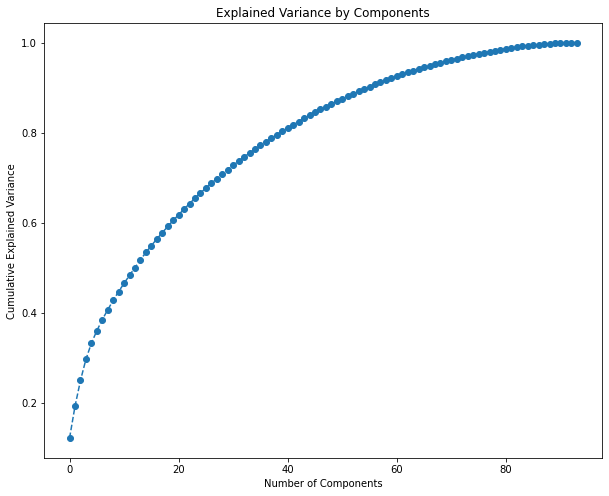

In [132]:
plt.figure(figsize = (10,8))
plt.plot(range(0,94), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [133]:
pca = PCA(n_components=0.95)

In [134]:
pca_X = pca.fit_transform(scaled_train_df)
pca_X.shape

(82323, 68)

In [135]:
x_train_pca = train.loc[:,"timbreAvg1":"timbreCov55"]
x_test_pca = test.loc[:,"timbreAvg1":"timbreCov55"]

In [72]:
cols = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44, \
       45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,91,92]

In [136]:
x_train_pca_avgs = train.loc[:, "averagesmean":"covcat"]
x_test_pca_avgs = test.loc[:,"averagesmean":"covcat"]

In [137]:
train = pd.concat([x_train_pca,x_train_pca_avgs],axis = 1)
test = pd.concat([x_test_pca,x_test_pca_avgs],axis=1)

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82323 entries, 0 to 82322
Data columns (total 71 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timbreAvg1    82323 non-null  float64
 1   timbreAvg2    82323 non-null  float64
 2   timbreAvg3    82323 non-null  float64
 3   timbreAvg4    82323 non-null  float64
 4   timbreAvg5    82323 non-null  float64
 5   timbreAvg6    82323 non-null  float64
 6   timbreAvg7    82323 non-null  float64
 7   timbreAvg8    82323 non-null  float64
 8   timbreAvg9    82323 non-null  float64
 9   timbreAvg10   82323 non-null  float64
 10  timbreAvg11   82323 non-null  float64
 11  timbreAvg12   82323 non-null  float64
 12  timbreCov1    82323 non-null  float64
 13  timbreCov2    82323 non-null  float64
 14  timbreCov3    82323 non-null  float64
 15  timbreCov4    82323 non-null  float64
 16  timbreCov5    82323 non-null  float64
 17  timbreCov6    82323 non-null  float64
 18  timbreCov7    82323 non-nu

### Reduced Dataframe

In [139]:
features_pca = train
target_pca = df_train['Year']

features_test_pca = test
target_test_pca = df_test['Year']

In [88]:
x_test

,timbreAvg1,timbreAvg2,timbreAvg3,timbreAvg4,timbreAvg5,timbreAvg6,timbreAvg7,timbreAvg8,timbreAvg9,timbreAvg10,...,timbreCov48,timbreCov49,timbreCov50,timbreCov51,timbreCov52,timbreCov53,timbreCov54,timbreCov55,averagesmean,averagescov
0,49.98846,25.47258,27.23391,0.81652,-30.39324,-23.77053,-6.89101,6.34835,0.52261,4.20927,...,-7.04751,-30.13375,17.93197,-3.88920,40.28657,-17.31362,37.61689,15.78357,4.024248,47.574316
1,49.67860,63.28540,13.77636,-7.79952,-16.61323,-22.89364,3.79465,-1.96933,-8.51960,0.55543,...,-120.49288,-13.68970,-12.69660,-22.05571,-165.16354,52.95689,70.60478,36.88171,5.930316,68.178248
2,44.26900,-24.22945,-67.58914,41.42693,4.45257,13.58366,-5.65095,23.88630,-8.57260,19.17336,...,400.52693,124.04634,19.87609,-35.40939,-813.06067,-485.57884,-214.54997,219.13187,5.271032,384.671097
3,38.56194,-35.87803,-29.87479,11.04163,18.21821,-14.12257,-12.26304,-11.95929,8.69171,9.51683,...,-42.60232,-30.20065,-19.46291,41.28760,47.40379,-387.52353,-53.07084,-4.00799,-0.727324,111.171460
4,31.11932,-238.37125,-67.10338,-41.90780,40.55931,-30.56039,-8.02563,1.42073,-18.11560,-11.48671,...,-3.73626,-46.51899,-86.54383,39.32135,-491.52328,15.06266,-182.31215,-53.99617,-28.171600,157.870801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,43.94313,-63.49380,-5.13434,7.27950,22.39731,-16.79260,9.76807,-10.82510,20.80684,-4.77305,...,-290.60960,49.18234,-64.79437,38.66884,-882.61770,639.61570,-50.66807,37.29735,0.053388,301.501400
9996,49.16531,21.30778,78.66236,10.25865,-5.72424,-13.24072,5.25752,-2.24797,12.56804,1.40506,...,-16.99827,1.98486,45.23857,-29.32105,215.81570,83.25928,114.76030,60.34094,11.858730,212.727300
9997,42.60756,-14.94956,-22.84246,-16.44181,-13.35149,24.68700,-27.02934,-2.45499,-13.06910,4.33113,...,917.57050,372.91390,85.66758,-11.46458,111.82020,-740.97090,52.36802,140.45730,-3.626647,234.923800
9998,53.69439,25.95187,61.26420,-3.79488,-18.06294,-14.41400,0.72451,3.31687,11.47318,1.70897,...,36.03002,25.58159,-5.34270,-20.03671,-40.42264,-53.79159,-23.06530,112.24840,10.021030,37.036270


#### Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

x_train = features_pca
y_train = target_pca
x_test = features_test_pca
y_test = target_test_pca
LR = LinearRegression()
# fitting the training data
LR = LR.fit(x_train,y_train)
y_pred_test = LR.predict(x_test)
y_pred_train = LR.predict(x_train)
LR.score(x_train, y_train)
print("Train R^2:", LR.score(x_train,y_train))
print("Test R^2:", LR.score(x_test,y_test))
print("Train MSE:",mean_squared_error(y_train,y_pred_train))
print("Test MSE:",mean_squared_error(y_test,y_pred_test))
print("Train MAE:", mean_absolute_error(y_train, y_pred_train))

Train R^2: 0.2545031222658569
Test R^2: 0.2125939888865095
Train MSE: 87.38813463850308
Test MSE: 94.30869637446153
Train MAE: 6.690723902918918


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
r2_score =cross_val_score(LR, x_train, y_train, scoring='r2', cv=folds)
MSE = cross_val_score(LR, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("Mean R^2:", mean(r2_score))
print("Mean MSE:", mean(MSE))

Mean R^2: 0.3014594134212033
Mean MSE: -78.47177711089024


#### CART 

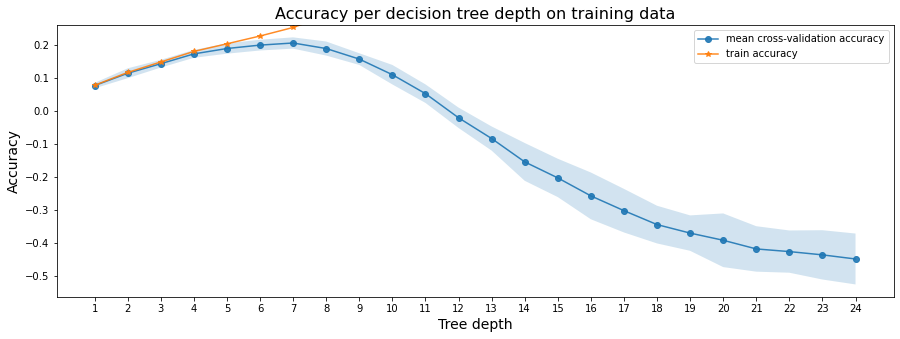

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='r2'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeRegressor(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(x_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'R-Square per decision tree depth on training data')


In [53]:
L = []
for i in range(1,25):
    dtree = DecisionTreeRegressor(max_depth=i)
    dtree.fit(x_train,y_train)
    y_pred = dtree.predict(x_test)
    L.append(round(r2_score(y_test,y_pred),4))
print(L.index(max(L)))
print(max(L))

6
0.1714


In [141]:
from sklearn.tree import DecisionTreeRegressor 
Regressor = DecisionTreeRegressor(random_state =20,criterion = "squared_error", max_depth = 6)

# Train Decision Tree Classifer
Regressor = Regressor.fit(x_train,y_train)

#Predict the response for test dataset
y_predtrain = Regressor.predict(x_train)
y_predtest = Regressor.predict(x_test)
train_MSE = mean_squared_error(y_train,y_predtrain)
test_MSE = mean_squared_error(y_test,y_predtest)
test_MAE = mean_absolute_error(y_test,y_predtest)
MAEt = mean_absolute_error(y_train,y_predtrain)
print("Train R^2:",Regressor.score(x_train,y_train))
print("Test R^2:", Regressor.score(x_test,y_test))
print("Train RMSE: {:.3f}".format(train_MSE))
print("Test RMSE: {:.3f}".format(test_MSE))
print("Train MAE: {:.3f}".format(MAEt))
print("Test MAE: {:.3f}".format(test_MAE))

Train R^2: 0.20302093493345896
Test R^2: 0.1410118939207906
Train RMSE: 93.423
Test RMSE: 102.882
Train MAE: 6.941
Test MAE: 7.269


In [27]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
r2_score =cross_val_score(Regressor, x_train, y_train, scoring='r2', cv=folds)
MSE = cross_val_score(Regressor, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("Mean R^2:", mean(r2_score))
print("Mean MSE:", mean(abs(MSE)))

Mean R^2: 0.20188462254094067
Mean MSE: 89.83667821669363


In [143]:
from sklearn.ensemble import RandomForestRegressor
Regressor = RandomForestRegressor(random_state =20, criterion = "squared_error", max_depth = 6)

# Train Decision Tree Classifer
Regressor = Regressor.fit(x_train,y_train)

#Predict the response for test dataset
y_predtrain = Regressor.predict(x_train)
y_predtest = Regressor.predict(x_test)
train_MSE = mean_squared_error(y_train,y_predtrain)
test_MSE = mean_squared_error(y_test,y_predtest)
test_MAE = mean_absolute_error(y_test,y_predtest)
MAEt = mean_absolute_error(y_train,y_predtrain)
print("Train R^2:",Regressor.score(x_train,y_train))
print("Test R^2:", Regressor.score(x_test,y_test))
print("Train RMSE: {:.3f}".format(train_MSE))
print("Test RMSE: {:.3f}".format(test_MSE))
print("Train MAE: {:.3f}".format(MAEt))
print("Test MAE: {:.3f}".format(test_MAE))

Train R^2: 0.23669387324733182
Test R^2: 0.1812359523413556
Train RMSE: 89.476
Test RMSE: 98.064
Train MAE: 6.786
Test MAE: 7.111


#### Gradient Boosting

In [142]:
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor
reg_params = {'max_depth': 3, 'n_estimators': 100}

# Create an instance of gradient boosting regressor
#
reg = GradientBoostingRegressor(**reg_params)
reg = reg.fit(x_train,y_train)
mse_test = mean_squared_error(y_test, reg.predict(x_test))
mse_train = mean_squared_error(y_train, reg.predict(x_train))
mae_test = mean_absolute_error(y_test, reg.predict(x_test))
mae_train = mean_absolute_error(y_train, reg.predict(x_train))
print("Train R^2:",reg.score(x_train,y_train))
print("Test R^2:", reg.score(x_test,y_test))
print("Train MSE: {:.3f}".format(mse_train))
print("Test MSE: {:.3f}".format(mse_test))
print("Train MAE: {:.3f}".format(mae_train))
print("Test MAE: {:.3f}".format(mae_test))

Train R^2: 0.29988254382595203
Test R^2: 0.24647383628472364
Train MSE: 82.069
Test MSE: 90.251
Train MAE: 6.450
Test MAE: 6.763


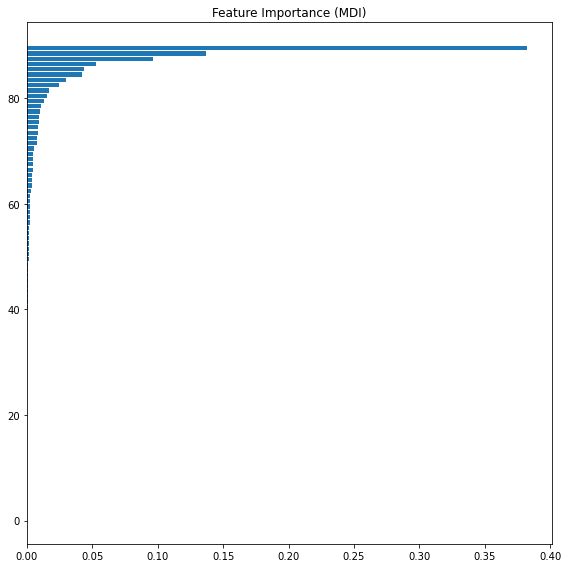

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Feature Importance (MDI)')
result = permutation_importance(reg, x_test , y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

## Neural Network